### Preparation

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import energy_data_lab as edl

In [2]:
base_dir = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
processed_data_path = os.path.join(base_dir, 'data', 'processed')

### Load Data

In [3]:
df_wp = pd.read_csv(
        os.path.join(processed_data_path, "Penmanshiel_SCADA_2022.csv"), index_col=0, 
        usecols=[0,1,2,5,6,7,8]
    )
df_wp.head()

,Wind speed (m/s),Wind direction (°),Power (kW),Potential power learned PC (kW),turbine,timestamp
timestamp_turbine,,,,,,
2022-01-01 00:00:00 T01,10.454255,190.406676,1652.268530,1526.705644,T01,2022-01-01 00:00:00
2022-01-01 00:10:00 T01,10.547255,190.905744,1634.746948,1551.595460,T01,2022-01-01 00:10:00
2022-01-01 00:20:00 T01,10.036760,186.150688,1400.744108,1414.499698,T01,2022-01-01 00:20:00
2022-01-01 00:30:00 T01,10.350545,187.775551,1583.718368,1498.832558,T01,2022-01-01 00:30:00
2022-01-01 00:40:00 T01,10.569531,184.599325,1572.652897,1557.532673,T01,2022-01-01 00:40:00


In [4]:
df_ws_actual = pd.read_csv(os.path.join(processed_data_path, "Hist_Weather.csv"), index_col=0, parse_dates=True,
                           usecols=[0,2,5])
df_ws_actual.head()

,wind_speed_100m,wind_direction_100m
date,,
2022-01-01 00:00:00+00:00,9.904544,271.73566
2022-01-01 01:00:00+00:00,10.140020,275.09200
2022-01-01 02:00:00+00:00,10.756393,275.86950
2022-01-01 03:00:00+00:00,10.538501,274.89900
2022-01-01 04:00:00+00:00,10.210779,278.44745


In [5]:
df_ws_forecast = pd.read_csv(os.path.join(processed_data_path, "Hist_Forecast.csv"), index_col=0, parse_dates=True)
df_ws_forecast.head()

,wind_speed_80m,wind_direction_80m
date,,
2022-01-01 00:00:00+00:00,10.594810,213.84009
2022-01-01 01:00:00+00:00,9.213577,205.73065
2022-01-01 02:00:00+00:00,7.592760,192.93806
2022-01-01 03:00:00+00:00,9.610411,192.01146
2022-01-01 04:00:00+00:00,10.307764,202.83370


### Cleaning

#### Wind Speed

In [ ]:
# plot wind speed density
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1,2,figsize=(15, 5))
sns.kdeplot(df_ws_actual['wind_speed_100m'], fill=True, ax=axs[0])
axs[0].set_title('Historical Wind Speed Open Meteo')
axs[0].set_xlabel('Wind Speed 100m (m/s)')
sns.kdeplot(df_ws_forecast['wind_speed_80m'], fill=True, ax=axs[1])
axs[1].set_title('Historical Forecast Wind Speed Open Meteo')
axs[1].set_xlabel('Wind Speed 80m (m/s)')
plt.show()

In [ ]:
print(f"Minimum historical wind speed 100m: {np.min(df_ws_actual['wind_speed_100m'])}")
print(f"Maximum historical wind speed 100m: {np.max(df_ws_actual['wind_speed_100m'])}")
print(f"Minimum historical forecasted wind speed 80m: {np.min(df_ws_forecast['wind_speed_80m'])}")
print(f"Maximum historical forecasted wind speed 80m: {np.max(df_ws_forecast['wind_speed_80m'])}")
print(f"Number of missing values historical wind speed: {df_ws_actual['wind_speed_100m'].isnull().sum()}")
print(f"Number of missing values forecasted wind speed: {df_ws_forecast['wind_speed_80m'].isnull().sum()}")


Looks reasonable, no need to clean data.

#### Wind Direction

In [ ]:
# plot wind direction density
sns.set_theme(style="whitegrid")
fig, axs = plt.subplots(1,2,figsize=(15, 5))
sns.kdeplot(df_ws_actual['wind_direction_100m'], fill=True, ax=axs[0])
axs[0].set_title('Historical Wind Direction Open Meteo')
axs[0].set_xlabel('Wind Direction 100m (m/s)')
sns.kdeplot(df_ws_forecast['wind_direction_80m'], fill=True, ax=axs[1])
axs[1].set_title('Historical Forecast Wind Direction Open Meteo')
axs[1].set_xlabel('Wind Direction 80m (m/s)')
plt.show()

In [ ]:
print(f"Minimum historical wind direction 100m: {np.min(df_ws_actual['wind_direction_100m'])}")
print(f"Maximum historical wind direction 100m: {np.max(df_ws_actual['wind_direction_100m'])}")
print(f"Minimum historical forecasted wind direction 80m: {np.min(df_ws_forecast['wind_direction_80m'])}")
print(f"Maximum historical forecasted wind direction 80m: {np.max(df_ws_forecast['wind_direction_80m'])}")
print(f"Number of missing values historical wind direction: {df_ws_actual['wind_direction_100m'].isnull().sum()}")
print(f"Number of missing values forecasted wind direction: {df_ws_forecast['wind_direction_80m'].isnull().sum()}")

Looks reasonable, no need to clean data.

#### Power Data

In [6]:
# treat negative active power values as zero values
print(f'{100*len(df_wp.loc[df_wp["Power (kW)"] < 0]) / len(df_wp):.4f}% of active power values were < 0.')
print("Will be set to 0.")
df_wp.loc[df_wp["Power (kW)"] < 0, "Power (kW)"] = 0

16.6221% of active power values were < 0.
Will be set to 0.


Outlier Quantiles:
0.05      0.000000
0.10      0.000000
0.50     24.300406
0.90    106.695604
0.95    155.464085
dtype: float64


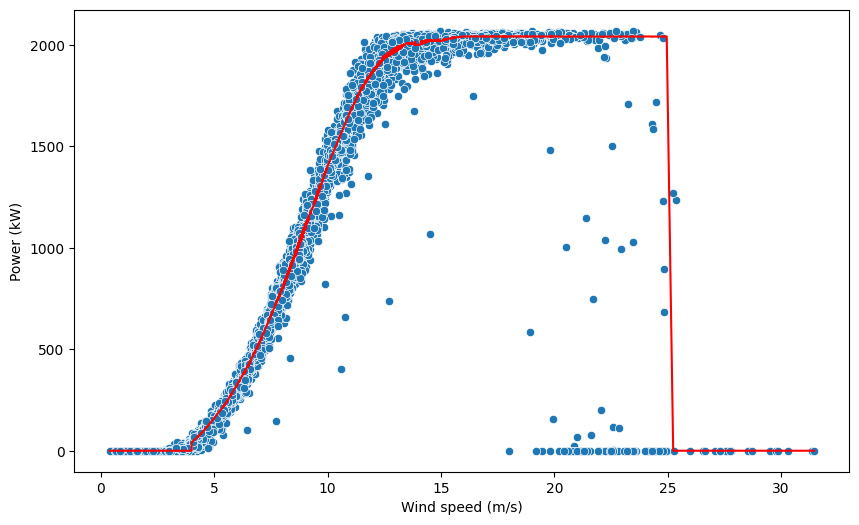

In [7]:
# power curve
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_wp[:5000], x='Wind speed (m/s)', y='Power (kW)', ax=ax)
# draw theoretical PC as lineplot
sns.lineplot(data=df_wp[:5000], x='Wind speed (m/s)', y='Potential power learned PC (kW)', ax=ax, color='red')
# print several quantiles of real power minus theoretical PC
print("Outlier Quantiles:")
print(abs(df_wp['Power (kW)']- df_wp['Potential power learned PC (kW)']).quantile([0.05, 0.1, 0.5, 0.9, 0.95]))
#sns.kdeplot(abs(df.iloc[:5000, 6] - df.iloc[:5000, 8]), ax=ax)
plt.show()

We replace too large deviations from the power curve with the theoretical power curve value.
Looking at the outlier quantiles, we decide that "too large" refers to a deviation of greater or equal to 100kW.

We'll swap 11.0444% of the data.
Cleaned Data:


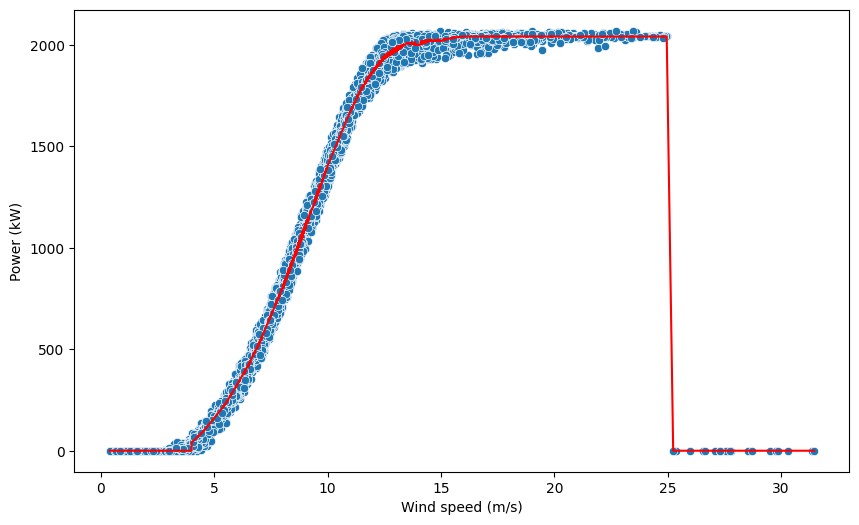

In [8]:
# replace all values where true power minus theoretical PC is greater than 100
swap_idx = df_wp.loc[abs(df_wp['Power (kW)'] - df_wp['Potential power learned PC (kW)']) > 100].index
print(f"We'll swap {100*len(swap_idx)/len(df_wp):.4f}% of the data.")
df_wp.loc[swap_idx, "Power (kW)"] = df_wp.loc[swap_idx, 'Potential power learned PC (kW)']
# power curve
print("Cleaned Data:")
fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(data=df_wp[:5000], x='Wind speed (m/s)', y='Power (kW)', ax=ax)
# draw theoretical PC as lineplot
sns.lineplot(data=df_wp[:5000], x='Wind speed (m/s)', y='Potential power learned PC (kW)', ax=ax, color='red')
plt.show()

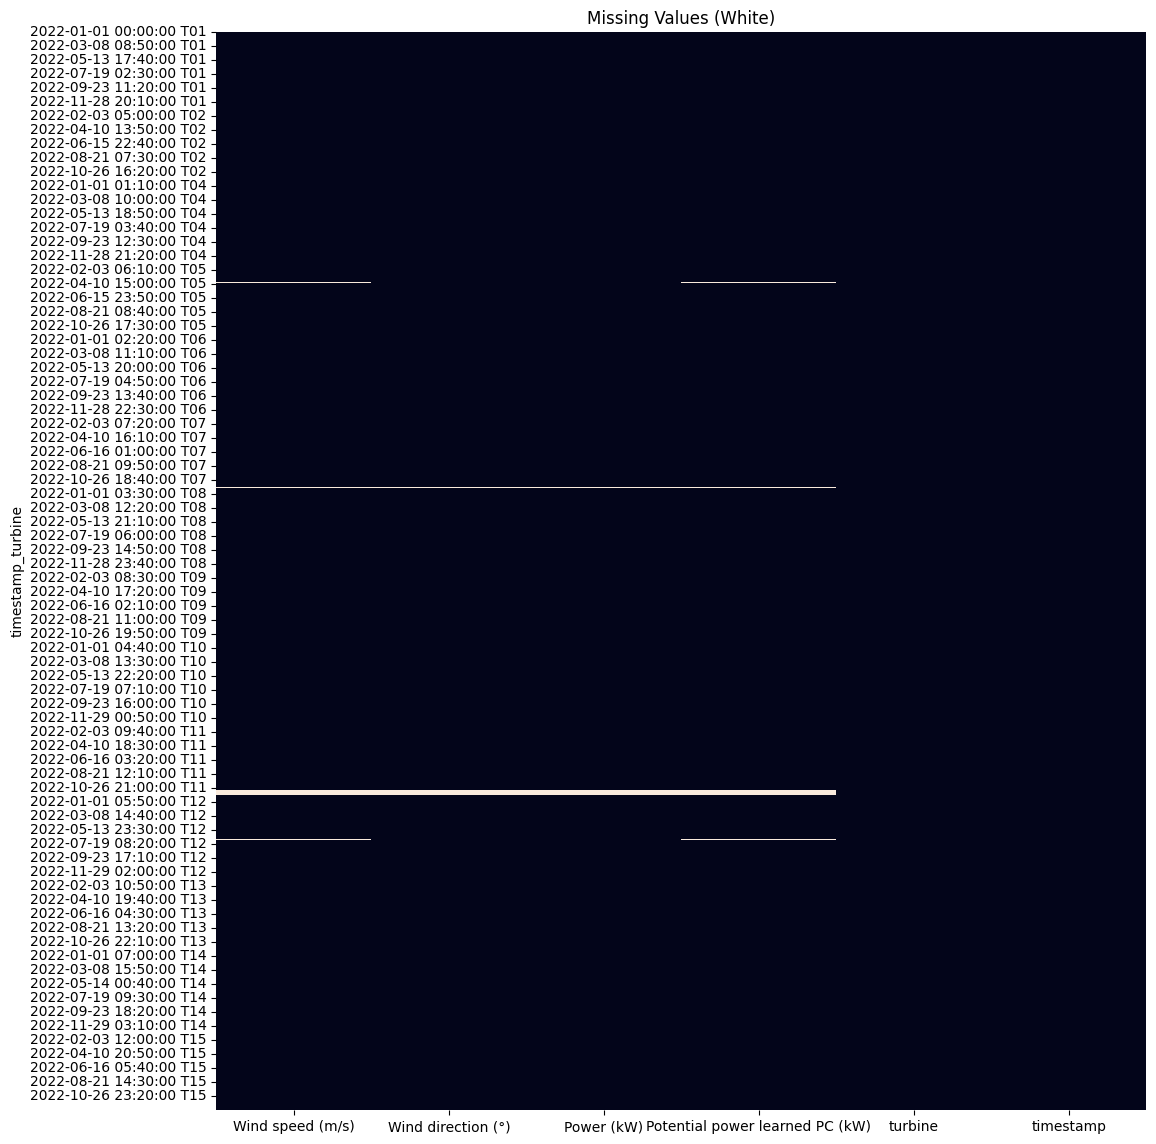

In [28]:
# look at missing values
fig, axs = plt.subplots(1, 1, figsize=(12, 14))
sns.heatmap(df_wp.isnull(), cbar=False, ax=axs)
axs.set_title('Missing Values (White)')
plt.show()

We fill missing values with the average power from the remaining turbines, if applicable.

In [38]:
missing_idx = df_wp.loc[df_wp['Power (kW)'].isna()].index
print(f"Number of missing values: {len(missing_idx)}")
turbines = df_wp['turbine'].unique()
for idx in missing_idx:
    # identify timestamp
    timestamp = df_wp.loc[idx, 'timestamp']
    # collect the power values from the other turbines
    power_values = df_wp.loc[df_wp['timestamp'] == timestamp, 'Power (kW)']
    if power_values.isna().sum() < len(turbines):
        df_wp.loc[idx, 'Power (kW)'] = np.mean(power_values.dropna())
print(f"Number of missing values after filling: {df_wp['Power (kW)'].isna().sum()}")

Number of missing values: 6702
Number of turbines: 14
Number of missing values after filling: 700


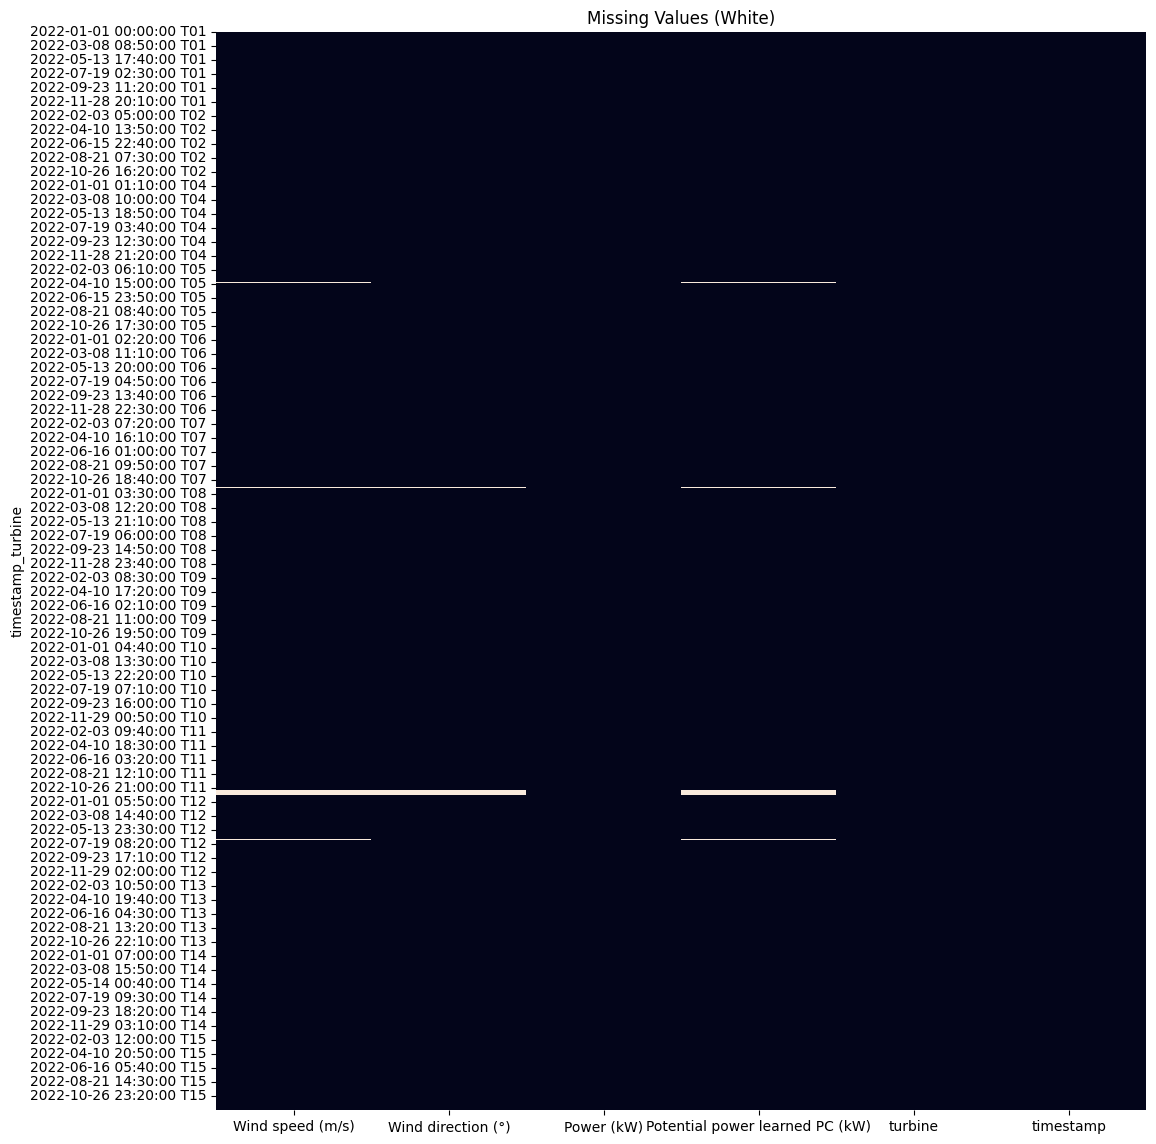

In [39]:
# look at missing values
fig, axs = plt.subplots(1, 1, figsize=(12, 14))
sns.heatmap(df_wp.isnull(), cbar=False, ax=axs)
axs.set_title('Missing Values (White)')
plt.show()

As now long period in Power is missing anymore, we can use forward fill for the remaining values.

In [41]:
# forward fill missing power values
df_wp['Power (kW)'] = df_wp['Power (kW)'].ffill()
print(f"Number of missing values after filling: {df_wp['Power (kW)'].isna().sum()}")

Number of missing values after filling: 0


### Aggregate Power Data

In [42]:
# creatw wp dataframe with turbines as columns
df_wp_turb_col = df_wp.pivot(index='timestamp', columns='turbine', values='Power (kW)')
df_wp_turb_col.head()

turbine,T01,T02,T04,T05,T06,T07,T08,T09,T10,T11,T12,T13,T14,T15
timestamp,,,,,,,,,,,,,,
2022-01-01 00:00:00,1526.705644,1639.085986,1608.382902,1557.281079,1591.170052,1245.707821,1227.890191,706.736159,823.451956,1491.428471,1633.688426,1393.650985,1690.007639,1478.170398
2022-01-01 00:10:00,1634.746948,1530.285002,1670.732361,1419.622316,1371.290543,940.130993,1376.357741,611.150427,715.576781,1313.111591,1948.493123,1507.278308,1571.218001,1319.695907
2022-01-01 00:20:00,1400.744108,1264.936729,1387.687138,1145.813273,1148.942981,716.920236,635.155156,670.556531,631.809209,924.054688,1078.036361,998.850976,987.529871,1157.681897
2022-01-01 00:30:00,1583.718368,1554.384334,1782.313066,1443.902526,1478.162317,1111.400348,951.750777,854.737996,830.635793,1221.627411,1200.266056,1129.202232,1631.790456,1444.214387
2022-01-01 00:40:00,1572.652897,1482.852804,1699.350028,1541.057749,1394.629812,989.392627,972.803982,840.334021,836.063975,1315.883140,1397.984314,1059.352384,1586.373043,1523.082642


In [43]:
df_final = pd.DataFrame({'Power (kW)': 0}, index=df_wp_turb_col.index)
for i in df_wp_turb_col.columns:
    df_final['Power (kW)'] += df_wp_turb_col[i].values
df_final

,Power (kW)
timestamp,
2022-01-01 00:00:00,19613.357709
2022-01-01 00:10:00,18929.690042
2022-01-01 00:20:00,14148.719154
2022-01-01 00:30:00,18218.106067
2022-01-01 00:40:00,18211.813418
...,...
2022-12-31 23:10:00,7597.382327
2022-12-31 23:20:00,7046.753965
2022-12-31 23:30:00,6024.710442


### Create High-Res Weather Data

In [44]:
# fill higher resolution with constant average value
df_final['Wind Speed (m/s)'] = None
df_final['Wind Speed Forecast (m/s)'] = None
df_final['Wind Direction (°)'] = None
df_final['Wind Direction Forecast (°)'] = None
tstp_counter = 0
for hour in df_ws_actual.index:
    ten_min_counter = 0
    while ten_min_counter < 6:
        idx = df_final.index[tstp_counter]
        df_final.loc[idx, 'Wind Speed (m/s)'] = df_ws_actual.loc[hour, 'wind_speed_100m']
        df_final.loc[idx, 'Wind Direction (°)'] = df_ws_actual.loc[hour, 'wind_direction_100m']
        df_final.loc[idx, 'Wind Speed Forecast (m/s)'] = df_ws_forecast.loc[hour, 'wind_speed_80m']
        df_final.loc[idx, 'Wind Direction Forecast (°)'] = df_ws_forecast.loc[hour, 'wind_direction_80m']
        ten_min_counter += 1
        tstp_counter += 1
df_final.head()

,Power (kW),Wind Speed (m/s),Wind Speed Forecast (m/s),Wind Direction (°),Wind Direction Forecast (°)
timestamp,,,,,
2022-01-01 00:00:00,19613.357709,9.904544,10.59481,271.73566,213.84009
2022-01-01 00:10:00,18929.690042,9.904544,10.59481,271.73566,213.84009
2022-01-01 00:20:00,14148.719154,9.904544,10.59481,271.73566,213.84009
2022-01-01 00:30:00,18218.106067,9.904544,10.59481,271.73566,213.84009
2022-01-01 00:40:00,18211.813418,9.904544,10.59481,271.73566,213.84009


### Angle Measurements

Nacelle direction is typically the angle between rotor axis and the truth north ($\phi_{np}$). The wind direction is measured using the vane. Wind direction ($\phi_{wd}$) in our data is given as the absolute wind direction (i.e., not relative to the turbine, but relative to the true north). The contained angle between the absolute wind direction and the nacelle ($\phi_{ye}$) can be computed as difference of wind direction and nacelle position. This should be the same angle as the vane position, i.e.

$$\phi_{ye} = \phi_{wd} - \phi_{np}$$

![image info](../../../figures/angles.png)

In [38]:
#df['Computed vane position 1+2 (°)'] = df['Wind direction (°)'] - df['Nacelle position (°)']

In [39]:
#fig, ax = plt.subplots(figsize=(10, 6))
#sns.scatterplot(data=df[:5000], x='Vane position 1+2 (°)', y='Computed vane position 1+2 (°)', ax=ax)
# draw vertical line f(x) = x
#sns.lineplot(x=[-180, 180], y=[-180, 180], ax=ax, color='red')
#plt.show()

The plot shows that our variable interpretation was correct. There are only few deviations, which one might consider cleaning. We will only proceed with wind speed and power values, so we refrain from doing so for now.

### Normalize Data and Save

In [45]:
# normalize all columns
for column in df_final.columns:
    print(f"Min of {column}: {df_final[column].min()}")
    print(f"Max of {column}: {df_final[column].max()}")
    df_final[column] = (df_final[column] - df_final[column].min()) / (df_final[column].max() - df_final[column].min())
df_final.head()

Min of Power (kW): 0.0
Max of Power (kW): 28856.585504080267
Min of Wind Speed (m/s): 0.1
Max of Wind Speed (m/s): 23.517015
Min of Wind Speed Forecast (m/s): 0.14142136
Max of Wind Speed Forecast (m/s): 28.014639
Min of Wind Direction (°): 0.67402154
Max of Wind Direction (°): 360.0
Min of Wind Direction Forecast (°): 0.50257015
Max of Wind Direction Forecast (°): 360.0


,Power (kW),Wind Speed (m/s),Wind Speed Forecast (m/s),Wind Direction (°),Wind Direction Forecast (°)
timestamp,,,,,
2022-01-01 00:00:00,0.679684,0.418693,0.375033,0.754361,0.593433
2022-01-01 00:10:00,0.655992,0.418693,0.375033,0.754361,0.593433
2022-01-01 00:20:00,0.490312,0.418693,0.375033,0.754361,0.593433
2022-01-01 00:30:00,0.631333,0.418693,0.375033,0.754361,0.593433
2022-01-01 00:40:00,0.631115,0.418693,0.375033,0.754361,0.593433


In [47]:
if not os.path.exists(os.path.join(processed_data_path, "Cleaned_Data.csv")):
    df_final.to_csv(os.path.join(processed_data_path, "Cleaned_Data.csv"))
else:
    df_final = pd.read_csv(os.path.join(processed_data_path, "Cleaned_Data.csv"), index_col=0, parse_dates=True)

#### Register This Notebook and Cleaned Data to EDL

In [ ]:
edl.register_code(
    name="Clean and Normalize Data",
    description="Replace false measurements, min-max normalize data. Save cleaned data to one CSV file.",
    file_type="IPYNB",
    source_url="https://gitlab.lrz.de/EMT/projects/edl-projects/registry-mvp/-/blob/main/usecases/wpf/src/data/03_clean_and_norm.ipynb",
    download_url="https://gitlab.lrz.de/EMT/projects/edl-projects/registry-mvp/-/raw/main/usecases/wpf/src/data/03_clean_and_norm.ipynb?inline=false",
    pipeline_name="Wind Power Forecasting",
    parent_name="Penmanshiel SCADA 2022",
)
edl.connect(
    pipeline_name="Wind Power Forecasting",
    parent_name="Historical Weather Forecast Data",
    target_name="Clean and Normalize Data",
)
edl.connect(
    pipeline_name="Wind Power Forecasting",
    parent_name="Historical Weather Data",
    target_name="Clean and Normalize Data",
)
edl.register_data_pandas(
    name="Cleaned Data",
    description="Contains features and target, cleaned and normalized.",
    file_type="CSV",
    df=df_final,
    pipeline_name="Wind Power Forecasting",
    parent_name="Clean and Normalize Data",
)